In [1]:
import sys
import numpy as np
import cv2
import cv2.ml
from time import sleep
from datetime import datetime
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)
p = os.path.join('../../','raw','CookIRCamET','Images','CookTests','HiRes')
p2 = os.path.join('../../','work','CookIRCamET','Images','CookTests','HiRes')

In [2]:
def local_glcm(img,wsize,measure,d,angle):
    prop = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            try:
                patch = img[i-int((wsize-1)/2):i+int((wsize-1)/2),j-int((wsize-1)/2):j+int((wsize-1)/2)]
                glcm = graycomatrix(patch, distances=[d], angles=[angle], levels=256,
                                    symmetric=True, normed=True)
                prop[i,j] = graycoprops(glcm, measure)[0,0]
            except:
                prop[i,j] = np.nan
    return prop

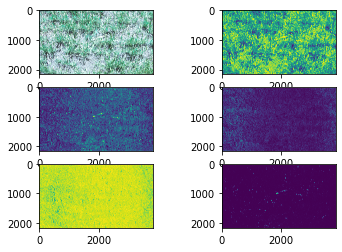

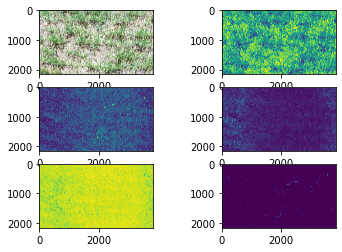

In [ ]:
for f in os.listdir(p):
    if 'bgr' in f:
        bgr = cv2.imread(os.path.join(p,f),cv2.IMREAD_UNCHANGED)
        f_labels = f.split('_bgr')[0]+'_labels.tif'
        labels = cv2.imread(os.path.join(p,f_labels),cv2.IMREAD_UNCHANGED)
        img = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
        glcm_hmg = local_glcm(img,11,'homogeneity',1,0)
        glcm_dis = local_glcm(img,11,'dissimilarity',1,0)
        glcm_cor = local_glcm(img,11,'correlation',1,0)
        glcm_asm = local_glcm(img,11,'ASM',1,0)
        plt.subplot(321)
        plt.imshow(bgr)
        plt.subplot(322)
        plt.imshow(img)
        plt.subplot(323)
        plt.imshow(glcm_hmg)
        plt.subplot(324)
        plt.imshow(glcm_dis)
        plt.subplot(325)
        plt.imshow(glcm_cor)
        plt.subplot(326)
        plt.imshow(glcm_asm)
        plt.show()